# Inaugural Project

Import and set magics

In [93]:
# Import and set magics
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

### Introduction
We will import the py-file that models the exchange economy with two consumers and given parameters. We find pairs of $x_1^A$ and $x_2^A$ that leave both consumers at least as well off as their initial endowment. This analysis will help us identify Pareto improvements, securing that the new allocations benefit at least one consumer without making the other worse off.

In [94]:
# Importing the py-file for the exchange economy
from inauguralproject import InauguralprojectClass
model = InauguralprojectClass()

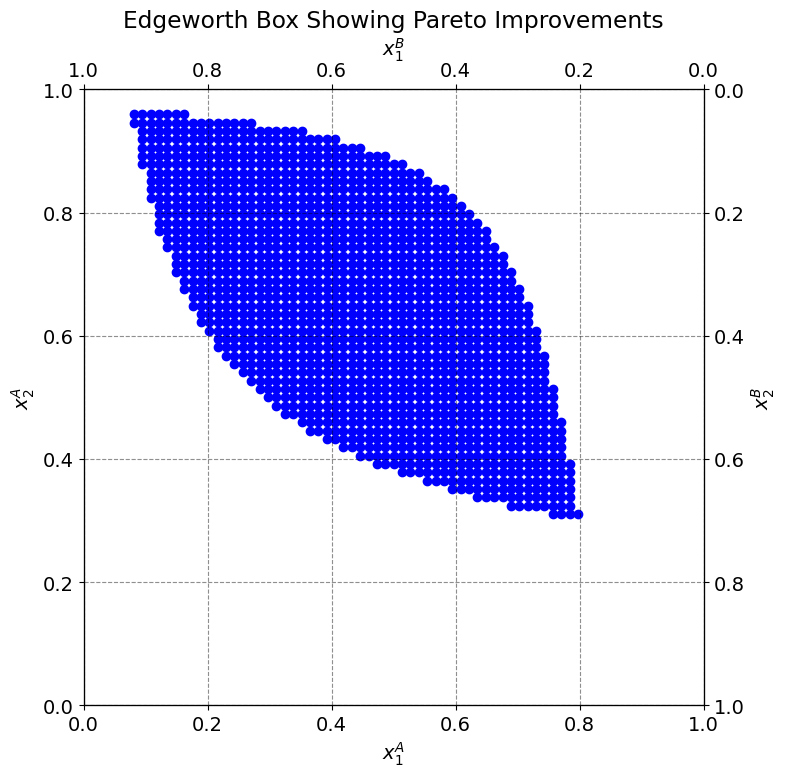

In [95]:
# Grid search size and p1 value range
N = 75
x_grid = np.linspace(0, 1, N)

# Initial utility for consumer A and B
uA_initial = model.utility_A(model.w1A, model.w2A)
uB_initial = model.utility_B(model.w1B, model.w2B)

pareto_set = []

# Loop for possible pareto improvements
for xA1 in x_grid:
    for xA2 in x_grid:
        xB1 = 1 - xA1
        xB2 = 1 - xA2
        
        
        uA_new = model.utility_A(xA1, xA2)
        uB_new = model.utility_B(xB1, xB2)
        
        
        if uA_new >= uA_initial and uB_new >= uB_initial:
            pareto_set.append((xA1, xA2))

# Pareto improvements defined for consumer A
pareto_xA1, pareto_xA2 = zip(*pareto_set) if pareto_set else ([], [])

# Plotting Edgeworth Box with pareto improvements for consumer A
plt.figure(figsize=(8, 8))
plt.scatter(pareto_xA1, pareto_xA2, color='blue', label='Pareto Improvements for A')
plt.xlabel('$x_1^A$')
plt.ylabel('$x_2^A$')
plt.xlim(0, 1)
plt.ylim(0, 1)
ax2 = plt.twiny()  
ax3 = plt.twinx()  
ax2.set_xlim(0, 1)
ax3.set_ylim(0, 1)
ax2.set_xlabel('$x_1^B$')
ax3.set_ylabel('$x_2^B$')
ax2.xaxis.set_label_position('top') 
ax3.yaxis.set_label_position('right')
ax2.xaxis.tick_top()
ax3.yaxis.tick_right()
ax2.invert_xaxis()
ax3.invert_yaxis()

plt.title('Edgeworth Box Showing Pareto Improvements')
plt.grid(True)


plt.show()

### Conclusion 
The initial endowments were given as $\omega_1^A = 0.8$, $\omega_2^A = 0.3$, $\omega_1^B = 0.2$, and $\omega_2^B = 0.7$. We aimed to identify allocations $(x_1^A, x_2^A)$ that leave both consumers at least as well off as their initial endowments, thereby representing Pareto improvements. 

In the Edgeworth Box, the initial endowment point is located at the far right bottom corner. From this starting point, we used a grid search to explore possible allocations of goods for consumer A. For each allocation, we calculated the utility levels for both consumers A and B. These allocations are visualized as blue data points in the Edgeworth Box, representing combinations of $x_1^A$ and $x_2^A$ that shows pareto improvements or the initial endowment allocations.


# Question 2

### Introduction

We use the epsilons defined in py-file to calculate the error in the market clearing conditions. We simulate for different prices which is made by a value range for $p_1$. Hereby we get different epsilon values, whereas values closer to 0 represent smaller error terms. 

In [96]:
# Grid search size and p1 value range
N = 75
p1_range = np.linspace(0.5, 2.5, N)

# List for errors in market clearing conditions
errors_1 = []
errors_2 = []

# Loop for errors in market clearing conditions for each p1 value
for p1 in p1_range:
    eps1, eps2 = model.epsilons(p1) 
    errors_1.append(eps1)
    errors_2.append(eps2)

# Results for Q.2
print("Errors in market clearing conditions:")
for i, p1 in enumerate(p1_range):
    print(f"p1 = {p1:.4f}, ε1 = {errors_1[i]:.4f}, ε2 = {errors_2[i]:.4f}")

Errors in market clearing conditions:
p1 = 0.5000, ε1 = 0.5333, ε2 = -0.2667
p1 = 0.5270, ε1 = 0.4752, ε2 = -0.2505
p1 = 0.5541, ε1 = 0.4228, ε2 = -0.2342
p1 = 0.5811, ε1 = 0.3752, ε2 = -0.2180
p1 = 0.6081, ε1 = 0.3319, ε2 = -0.2018
p1 = 0.6351, ε1 = 0.2922, ε2 = -0.1856
p1 = 0.6622, ε1 = 0.2558, ε2 = -0.1694
p1 = 0.6892, ε1 = 0.2222, ε2 = -0.1532
p1 = 0.7162, ε1 = 0.1912, ε2 = -0.1369
p1 = 0.7432, ε1 = 0.1624, ε2 = -0.1207
p1 = 0.7703, ε1 = 0.1357, ε2 = -0.1045
p1 = 0.7973, ε1 = 0.1107, ε2 = -0.0883
p1 = 0.8243, ε1 = 0.0874, ε2 = -0.0721
p1 = 0.8514, ε1 = 0.0656, ε2 = -0.0559
p1 = 0.8784, ε1 = 0.0451, ε2 = -0.0396
p1 = 0.9054, ε1 = 0.0259, ε2 = -0.0234
p1 = 0.9324, ε1 = 0.0077, ε2 = -0.0072
p1 = 0.9595, ε1 = -0.0094, ε2 = 0.0090
p1 = 0.9865, ε1 = -0.0256, ε2 = 0.0252
p1 = 1.0135, ε1 = -0.0409, ε2 = 0.0414
p1 = 1.0405, ε1 = -0.0554, ε2 = 0.0577
p1 = 1.0676, ε1 = -0.0692, ε2 = 0.0739
p1 = 1.0946, ε1 = -0.0823, ε2 = 0.0901
p1 = 1.1216, ε1 = -0.0948, ε2 = 0.1063
p1 = 1.1486, ε1 = -0.1067,

### Conclusion

We print a overview of the error terms for different $p_1$ values in the range of 0.5 to 2.5. We observe a high value of $p_1$ gets a high $\epsilon_2$ value and a low price a high $\epsilon_1$. We identify that a price of 0.9324 or 0.9595 must be the optimal price for market clearing condition as they are the closest to minimum.

# Question 3

### Introduction 

We use the defined error terms from question 2 to find the market clearing price. This is done by minimizing the combined error terms value for a specific price. 

The market clearing price is 0.9324


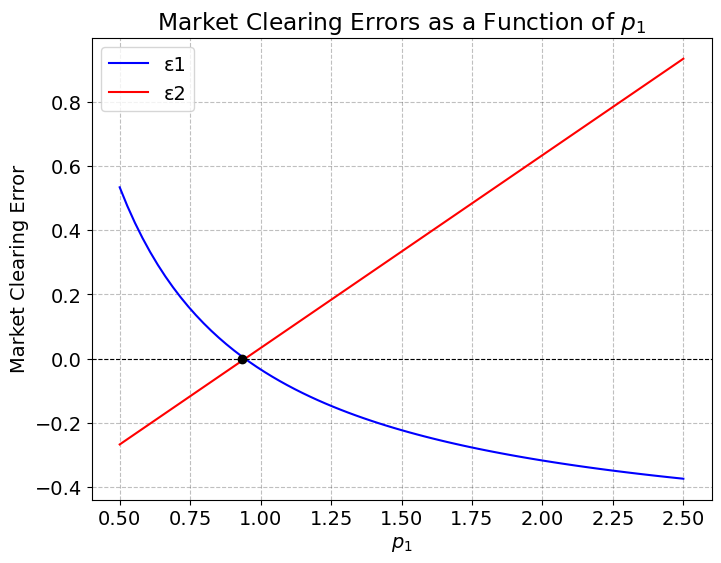

In [97]:
# Minimizing value of sum of error terms
combined_errors = np.abs(np.array(errors_1)) + np.abs(np.array(errors_2))
min_abs_error_index = np.argmin(combined_errors)
market_clearing_p1 = p1_range[min_abs_error_index]

# Result for Q.3
print(f"The market clearing price is {market_clearing_p1:.4f}")

# Plotting the errors
plt.figure(figsize=(8, 6))
plt.plot(p1_range, errors_1, label='ε1', color='blue')
plt.plot(p1_range, errors_2, label='ε2', color='red')
plt.scatter([market_clearing_p1], [0], color='black', zorder=5)  # Mark the minimum error point
plt.title('Market Clearing Errors as a Function of $p_1$')
plt.xlabel('$p_1$')
plt.ylabel('Market Clearing Error')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True)
plt.show()

In [98]:
# Defining the allocation for the market clearing for later use
Allocation_3 = model.demand_A(market_clearing_p1)
print(f"The allocation at the market clearing price {market_clearing_p1:.4f} is: {Allocation_3}")

The allocation at the market clearing price 0.9324 is: (0.3739130434782608, 0.6972972972972974)


### Conclusion

We find that the optimal market clearing price is 0.9324 with the given grid search size. We observe that the sum of error terms is as close to zero as possible in the given grid search and hereby we get optimal market clearing price. If we would use a larger sample size grid search we would get that the market clearing price would be 0.9444.

# Question 4.a

### Introduction

In this question we find the maximum utility for consumer A at a given price. This is made by using the p1 value range given in question 2. We use the utility functions and demand functions from the py-file to find maximum utility for consumer A.

4.a: Optimal price for Agent A (within given price range) is 1.9054, maximizing their utility at 0.6336.
Optimal allocation for Agent A is x1A = 0.6217, x2A = 0.6396.


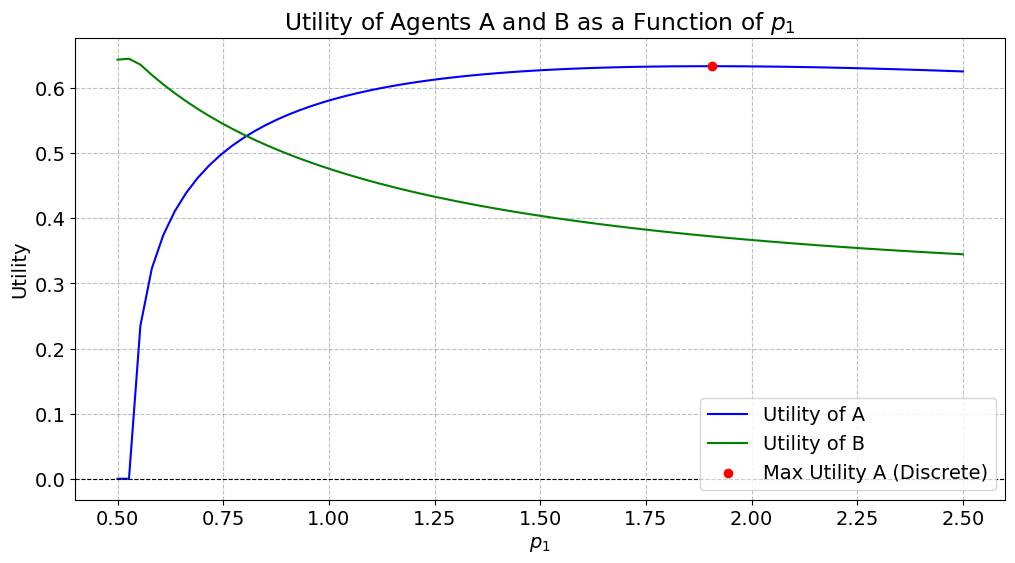

In [99]:
# Utilities and demands for each p1 for both consumer A and B
a_utility = []
b_utility = []

for p1 in p1_range:
    x1B, x2B = model.demand_B(p1)
    x1B = np.clip(x1B, 0, 1)
    x2B = np.clip(x2B, 0, 1)

    x1A = 1 - x1B
    x2A = 1 - x2B
    a_utility.append(model.utility_A(x1A, x2A))
    b_utility.append(model.utility_B(x1B, x2B))

# Finding the optimal prices and utilities for consumer A
max_utility_index_A = np.argmax(a_utility)
optimal_price_A = p1_range[max_utility_index_A]
max_utility_A = a_utility[max_utility_index_A]
optimal_allocation_A = (1 - np.clip(model.demand_B(optimal_price_A)[0], 0, 1), 
                        1 - np.clip(model.demand_B(optimal_price_A)[1], 0, 1))

# Results for 4a
print(f"4.a: Optimal price for Agent A (within given price range) is {optimal_price_A:.4f}, maximizing their utility at {max_utility_A:.4f}.")
print(f"Optimal allocation for Agent A is x1A = {optimal_allocation_A[0]:.4f}, x2A = {optimal_allocation_A[1]:.4f}.")

# Plotting the utilities as functions of p1
plt.figure(figsize=(12, 6))
plt.plot(p1_range, a_utility, label='Utility of A', color='blue')
plt.plot(p1_range, b_utility, label='Utility of B', color='green')
plt.scatter([optimal_price_A], [max_utility_A], color='red', zorder=5, label='Max Utility A (Discrete)')
plt.title('Utility of Agents A and B as a Function of $p_1$')
plt.xlabel('$p_1$')
plt.ylabel('Utility')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True)
plt.show()



### Conclusion 

We maximized consumer A's utility and found the relevant estimation, whereas we get the optimal $p_1=1.9054$, $u_A = 0.6336$ and the allocation $(x_1^A, x_2^A)=(0.6127,0.6396)$. Hereby we solved the maximization of utility for consumer A.

# Question 4.b

### Introduction


The method used is the same as in 4.a, but this time $p_1$ is in continuous time as a positive number. We find the maximum utility by minimizing the negative utility for consumer A. 

In [100]:
# Minimize the negative utility function to maximize
result = minimize_scalar(model.neg_utility_A, bounds=(0.1, 5), method='bounded')

# Find the optimal price and maximum utility for consumer A
optimal_price_A_continuous = result.x
max_utility_A_continuous = -result.fun
optimal_allocation_A_continuous = (1 - np.clip(model.demand_B(optimal_price_A_continuous)[0], 0, 1), 
                                   1 - np.clip(model.demand_B(optimal_price_A_continuous)[1], 0, 1))

# Results for 4.b
print(f"4.b: Optimal price for Agent A (continuous) is {optimal_price_A_continuous:.4f}, maximizing their utility at {max_utility_A_continuous:.4f}.")
print(f"Optimal allocation for Agent A is x1A = {optimal_allocation_A_continuous[0]:.4f}, x2A = {optimal_allocation_A_continuous[1]:.4f}.")
Allocation_4b = ({optimal_allocation_A_continuous[0]}, {optimal_allocation_A_continuous[1]})

4.b: Optimal price for Agent A (continuous) is 1.8993, maximizing their utility at 0.6336.
Optimal allocation for Agent A is x1A = 0.6210, x2A = 0.6400.


### Conclusion 

We maximized consumer A's utility and found the relevant estimation, whereas we get the optimal $p_1=1.8993$, $u_A = 0.6336$ and the allocation $(x_1^A, x_2^A)=(0.6210,0.6400)$. Hereby we solved the maximization of utility for consumer A for $p_1$ in continuous time.

Comparing the two results from 4.a and 4.b, we get that the optimal allocations is nearly identical. We use a search grid of 75 and it provides a quite large sample size for prices from 0.5 to 2.5. This ensures that we capture data points close to the optimal price in continuous time, making it make sense that the optimal values is nearly identical.

# Question 5.a

### Introduction

We find the optimal allocation for consumer A, but such that consumer B is not worse of than the initial endowment. The restriction applied is from Question 1., where we have got the restrictions C. The restrictions(C) is defined in the py-file.

In [101]:
# Fine search grid for x1^A and x2^A
x1A_range = np.linspace(0, 1, 1000)
x2A_range = np.linspace(0, 1, 1000)

# Store optimal variables
max_utility_A = 0
optimal_x1A = None
optimal_x2A = None

# Loop for optimal allocation with the imposed restrictions
for x1A in x1A_range:
    for x2A in x2A_range:
        if model.pareto_C(x1A, x2A):
            utility_A_value = model.utility_A(x1A, x2A)
            if utility_A_value > max_utility_A:
                max_utility_A = utility_A_value
                optimal_x1A = x1A
                optimal_x2A = x2A

#Result for 5.a
print(f"The allocation with the highest utility for A in set C is ({optimal_x1A:.4f}, {optimal_x2A:.4f})")
print(f"where the utility for A is {max_utility_A:.4f}")



The allocation with the highest utility for A in set C is (0.5696, 0.8488)
where the utility for A is 0.7431


### Conclusion

For the given restriction we get the optimal allocation for consumer A to be: $(x_1^A,x_2^A) = (0.5696,0.8488)$.

# Question 5.b

### Introduction

We find the optimal allocation for consumer A, but such that consumer B is not worse of than the initial endowment. In this question we don't impose any other restrictions for the model.

In [102]:
# The initial utility for consumer B
initial_utility_B = model.utility_B(model.w1B, model.w2B)

# Consumer B must not be worse off 
constraints = [
    {'type': 'ineq', 'fun': lambda x: model.utility_B(1-x[0], 1-x[1]) - initial_utility_B}
]

# Bounds and initial guess
bounds = [(0, 1), (0, 1)]
x0 = [model.w1A, model.w2A]

# The optimization problem for consumer A
result = minimize(model.neg_max_u_a, x0, method='SLSQP', bounds=bounds, constraints=constraints)

# Result of 5.b
if result.success:
    optimal_x1A, optimal_x2A = result.x
    optimal_utility = -result.fun  
    print(f"The allocation with the highest utility for A is ({optimal_x1A:.4f}, {optimal_x2A:.4f})")
    print(f"where the utility for A is {optimal_utility:.4f}")
else:
    optimal_x1A, optimal_x2A, optimal_utility = None, None, None
    print("Optimization was unsuccessful.")


The allocation with the highest utility for A is (0.5757, 0.8444)
where the utility for A is 0.7432


### Conclusion

For the given restriction but without restriction C, we get the optimal allocation for consumer A to be: $(x_1^A,x_2^A) = (0.5757,0.8444)$.

# Question 6.a

### Introduction 

I this question we solve the optimization problem for an utilitarian social planner instead of consumer A. The social planner try to optimize the aggregated utility for consumer A and B. We use the equation from the py-file to find the optimal allocation.

In [103]:
# Bounds to ensure x1A and x2A are within [0, 1]
bounds_for_6a = [(0, 1), (0, 1)]

# Initial guess for the variables
x0_for_6a = [0.5, 0.5]

# Solving the optimization problem for the social planner
result_6a = minimize(model.neg_max_u_ab, x0_for_6a, method='SLSQP', bounds=bounds)

if result_6a.success:
    optimal_x1A_6a, optimal_x2A_6a = result_6a.x
    optimal_utility_6a = -result_6a.fun  
    print(f"The allocation with the highest utility for A is ({optimal_x1A_6a:.4f}, {optimal_x2A_6a:.4f})")
    print(f"where the utility for A is {optimal_utility_6a:.4f}")
else:
    optimal_x1A_6a, optimal_x2A_6a, optimal_utility_6a = None, None, None
    print("Optimization was unsuccessful.")

The allocation with the highest utility for A is (0.3334, 0.6666)
where the utility for A is 1.0583


### Conclusion

The social planners maximization problem get that the highest aggregated utility is when $(x_1^A,x_2^B)=(0.3334, 0.6666)$. 

# Question 6.b

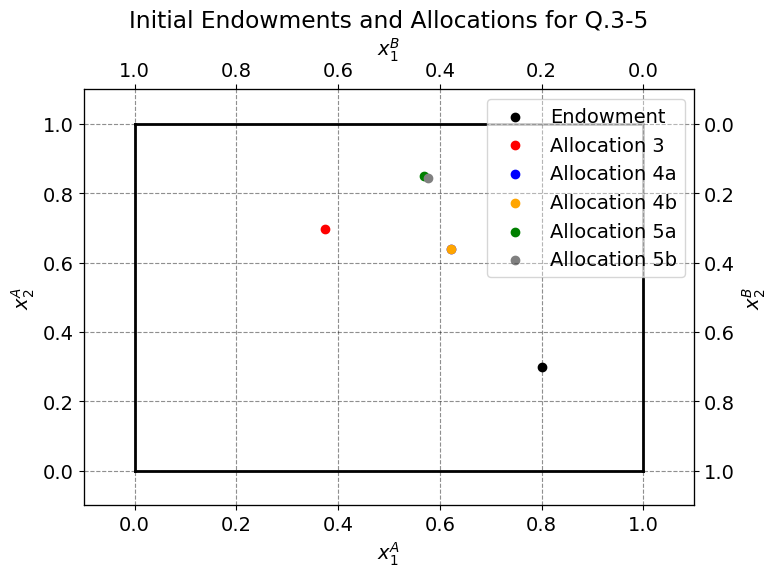

In [104]:
# Plotting
w1bar, w2bar = 1, 1

fig, ax_A = plt.subplots(figsize=(8, 6))

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")
temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting allocations from Question Q.3-5
ax_A.scatter(model.w1A, model.w2A, marker='o', color='black', label='Endowment')
ax_A.scatter(0.3739, 0.6973, marker='o', color='red', label='Allocation 3')
ax_A.scatter(0.6217, 0.6396, marker='o', color='blue', label='Allocation 4a')
ax_A.scatter(0.6210, 0.6400, marker='o', color='orange', label='Allocation 4b')
ax_A.scatter(0.5695, 0.8488, marker='o', color='green', label='Allocation 5a')
ax_A.scatter(0.5757, 0.8444, marker='o', color='gray', label='Allocation 5b')


ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')
ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])
ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1, 1))
ax_A.set_title('Initial Endowments and Allocations for Q.3-5')

plt.tight_layout()
plt.show()




### Conclusion

The allocation for question 3 is favorable to ensure that both markets clear and we get the optimal price for the good. The allocation does not maximize utility for the consumers and therefore are not ideal for the two consumers.


The allocation for question 4.a is favorable to maximum utility for player A in a given price range, but is limited by the price range to find the absolute optimal allocation. In 4.b this problem get solved by using continuous time, but the not so favorable point with both these allocation is that consumer A does not include consumer B's utility in the allocation selection. Although we observe almost the same allocation.

The allocation for question 5.a is favorable for the consumers, because they are atleast better off than the initial endowment. This allocation is restricted on C and therefore the optimal utility for consumers may not be reached. In 5.b we remove the restriction which ensures consumer A to maximize her utility and consumer B atleast gets the utility from the endowment. This can still may lead to not being in pareto optimal allocation, because consumer B could get a higher utility. 

# Question 7

### Introduction

We draw a random set which are uniform distributed. We use seed number 42 through the rest of the questions. Afterward we plot our distribution.

In [105]:
# Draw with seed 42
np.random.seed(42)

# Using a random uniform distribution for both w1^A and w2^A.
W = np.random.uniform(low=0, high=1, size=(50, 2))

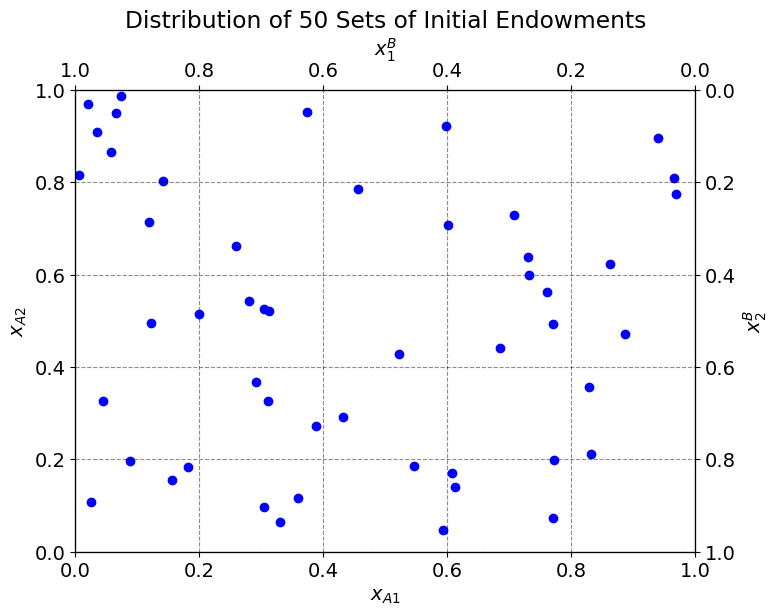

In [106]:
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(W[:, 0], W[:, 1], color='blue', marker='o', label='Initial Endowments $(\omega_{1A}, \omega_{2A})$')
plt.title('Distribution of 50 Sets of Initial Endowments')
plt.xlabel('$x_{A1}$')
plt.ylabel('$x_{A2}$')

plt.xlim(0, 1)
plt.ylim(0, 1)
ax2 = plt.twiny()  
ax3 = plt.twinx()  
ax2.set_xlim(0, 1)
ax3.set_ylim(0, 1)
ax2.set_xlabel('$x_1^B$')
ax3.set_ylabel('$x_2^B$')
ax2.xaxis.set_label_position('top') 
ax3.yaxis.set_label_position('right')
ax2.xaxis.tick_top()
ax3.yaxis.tick_right()
ax2.invert_xaxis()
ax3.invert_yaxis()
plt.grid(True)


plt.show()

### Conclusion

We drew a set of 50 elements represented in the graph.

# Question 8

### Introduction

We find the market equilibrium allocations for the 50 elements with the draw from Question 7. 


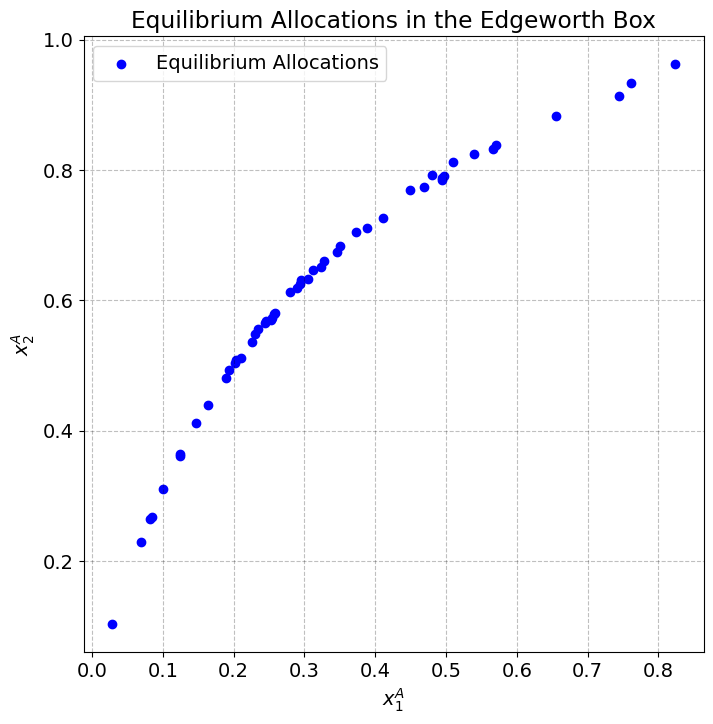

In [107]:
# Simulate market equilibria and finding allocations
equilibrium_allocations = [model.find_equilibrium(w[0], w[1]) for w in W]
x1A_vals = [alloc[0] for alloc in equilibrium_allocations]
x2A_vals = [alloc[1] for alloc in equilibrium_allocations]

# Plotting
plt.figure(figsize=(8, 8))
plt.scatter(x1A_vals, x2A_vals, c='blue', label='Equilibrium Allocations')
plt.title('Equilibrium Allocations in the Edgeworth Box')
plt.xlabel('$x_1^A$')
plt.ylabel('$x_2^A$')
plt.grid(True)
plt.legend()
plt.show()


### Conclusion

The graph Equilibrium Allocations in the Edgeworth Box shows a series of equilibrium points for the two-good economy. The data points follow a curve within the box, indicating preferred or more stable allocations where consumer A and B's consumption of $x_1$ and $x_2$ meet equilibrium conditions. 